In [135]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup

import requests
import matplotlib.pyplot as plt
import numpy
import pandas as pd  
from math import *
import time, datetime
import sys
sys.version

'3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]'

In [2]:
now = str(time.time()).split('.')[0]
print(now)
print(str(datetime.datetime.now()).split('.')[0])

1577236710
2019-12-24 20:18:30


In [3]:
bidsAreHigh = false
maPortfolio = 25000
maCash = 25000

url = "https://query1.finance.yahoo.com/v8/finance/chart/%5EGSPC?symbol=%5EGSPC&period1={}&period2={}&interval={}&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US&crumb=ED2zlWJHcMa&corsDomain=finance.yahoo.com"

r = requests.get(url.format('1574186393', now, '30m'))

# r = requests.get("""https://query1.finance.yahoo.com/v8/finance/chart/%5EGSPC?symbol=%5EGSPC&period1=1574186393&period2=1576778393&interval=30m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US&crumb=ED2zlWJHcMa&corsDomain=finance.yahoo.com
# """)
yahoo = r.json()
time = yahoo["chart"]["result"][0]["timestamp"]
quote = yahoo["chart"]["result"][0]["indicators"]["quote"][0]



In [4]:
def MFI(df, n):
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    i = 0
    PosMF = [0]
    while i < df.index[-1]:
        if PP[i + 1] > PP[i]:
            PosMF.append(PP[i + 1] * df.get_value(i + 1, 'Volume'))
        else:
            PosMF.append(0)
        i = i + 1
    PosMF = pd.Series(PosMF)
    TotMF = PP * df['Volume']
    MFR = pd.Series(PosMF / TotMF)
    MFI = pd.Series(MFR.rolling(n).mean(), name = 'MFI_' + str(n))
    df = df.join(MFI)
    return df

def MFI2(df, n):
    """
    Money Flow Index and Ratio
    """
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    i = 0
    PosMF = [0]
    while i < len(df) - 1:  # df.index[-1]:
        if PP[i + 1] > PP[i]:
            PosMF.append(PP[i + 1] * df.iat[i + 1, df.columns.get_loc('Volume')])
        else:
            PosMF.append(0)
        i=i + 1
    PosMF = pd.Series(PosMF)
    TotMF = PP * df['Volume']
    MFR = pd.Series(PosMF / TotMF)
    result = pd.Series(MFR.rolling(n).mean(), name='MFI_' + str(n))
    return result


# intialise data of lists. 
data = {'Open': quote['open'] , 
        'Low': quote['low'] , 
        'High': quote['high'], 
        'Close': quote['close'],
        'Volume': quote['volume']} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df 

,Open,Low,High,Close,Volume
0,3119.360107,3119.290039,3120.560059,3120.560059,0
1,3120.570068,3118.729980,3122.389893,3121.030029,76558773
2,3121.030029,3120.699951,3122.659912,3121.040039,78143695
3,3121.030029,3121.030029,3125.159912,3124.820068,84908468
4,3124.820068,3121.570068,3124.860107,3122.040039,83130457
...,...,...,...,...,...
352,3223.090088,3222.709961,3223.770020,3222.889893,54718205
353,3222.889893,3222.120117,3223.250000,3222.810059,53728833
354,3222.810059,3221.850098,3223.610107,3223.439941,93025607
355,3223.409912,3223.340088,3223.409912,3223.379883,75270747


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
352    0.357143
353    0.357143
354    0.357143
355    0.428571
356    0.428571
Name: MFI_14, Length: 357, dtype: float64


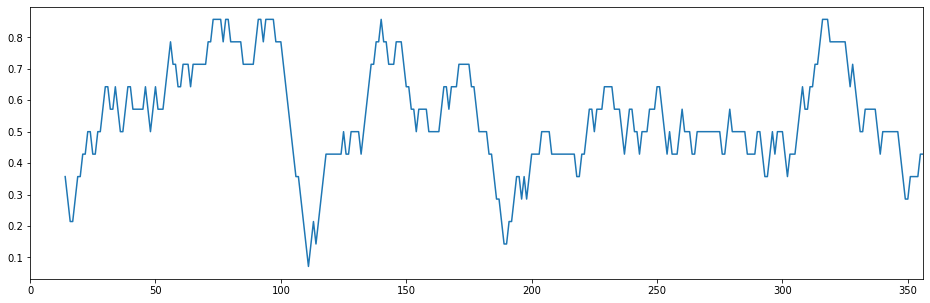

In [12]:
# mf = MFI(df, 14)
mfi = MFI2(df, 14)
mfi.plot(figsize=(16, 5))
# mf
print(mfi)

In [27]:
def checkBids(stock):
    stockRequest = requests.get('http://markets.cboe.com/json/edgx/book/TVIX')
#     stockData = stockRequest.json()
    print(stockRequest)
#     stockBids = stockData['data']['bids']
#     stockAsks = stockData['data']['asks']
#     stockPrice = stockData['data']['trades'][0][2]
#     print('current %s price is %s' % (stock, stockPrice))
#     while i < len(stockBids) - 1:
#         if i[1] > 1600:
#             bidsAreHigh = true
            
checkBids('TVIX')


<Response [403]>


In [142]:
def buy(stockPrice, n):
#     getAmount
#     subtract
#     keep the amount as a sum of stock value and the remaining cash
    stocksValue = stockPrice * n
    maCash = maCash - stocksValue
    
book = None
bookSoup = None
browser = webdriver.Chrome('C:\chromedriver')
bookRaw = None

def startBrowser():
    global book
    global bookSoup
    global browser
    global bookRaw
    browser.get('http://markets.cboe.com/us/equities/market_statistics/book_viewer/')
    time.sleep(2)
    button = browser.find_element_by_xpath('//button[text()="I agree"]')
    actions = ActionChains(browser)
    actions.pause(1)
#     actions.move_to_element(button)
    print(button)
#     actions.click(button)
    actions.pause(1)
    actions.perform()
    bookRaw = browser.find_element_by_xpath('//*[@id="bookViewer0"]/div[1]/table[2]/tbody')
    price = browser.find_element_by_class_name('book-viewer__trades-price').text
#     shares = 
    book = bookRaw.get_attribute('innerHTML')
    bookSoup = BeautifulSoup(book, 'lxml').html.body
    i = 0
#     for row in bookSoup:
#         i+=1
#         print('row number %s printing' % i)
#         for subrow in row:
#             print(subrow)
    print(price)
    print('book ===============>', book)
    print('bookSoup ===============>', bookSoup)
    
    
startBrowser()

<selenium.webdriver.remote.webelement.WebElement (session="adf6b95e68567c8aa0646e4f9c7d0d40", element="ca075168-51fd-4ed6-8735-f39748875dc2")>
28.67
book ===============> 
              <tr class="book-viewer-data-row">
                  <td class="book-viewer__ask__th t5" rowspan="5"><i class="sprite book-viewer__sprite book-viewer__sprite--ask"></i><span class="hide">Asks</span></td>
                  <td class="book-viewer__ask book-viewer__ask-shares" id="ext-gen1052">&nbsp;</td>
                  <td class="book-viewer__ask book-viewer__ask-quotes" id="ext-gen1054">&nbsp;</td>
                  <td class="book-viewer__ask book-viewer__ask-price book-viewer-price" id="ext-gen1053">&nbsp;</td>
                  <td class="book-viewer__trades-time" id="ext-gen1084">13:07:00</td>
                  <td class="book-viewer__trades-price" id="ext-gen1083">28.67</td>
                  <td class="book-viewer__trades-shares" id="ext-gen1082">100</td>
              </tr>
              <tr cla

In [153]:
i = 0
attachment = []
last10Trades = browser.find_elements_by_class_name("book-viewer__trades-price")
topBidsPrice = browser.find_elements_by_class_name("book-viewer__bid-price")
topBidShares = browser.find_elements_by_class_name("book-viewer__bid-shares")
topAskPrice = browser.find_elements_by_class_name("book-viewer__ask-price")
topAskShares = browser.find_elements_by_class_name("book-viewer__ask-shares")

print(last10Trades)
print(topBidsPrice)
for i in topBids:
    print(i, i.text)
# for row in bookSoup:
#     i+=1
#     print('rw number %s printing' % i)
#     r = bookRaw.find_all("td", { "class": "book-viewer__trades-price"})
#     attachment.append(r)
    
#     for subrow in row:
# #        tag.has_attr('class')
#         s = subrow.string
#         print(type(s))
#         except NavigableString: 
#             pass
print(attachment)

[<selenium.webdriver.remote.webelement.WebElement (session="adf6b95e68567c8aa0646e4f9c7d0d40", element="323a4fef-8393-401b-896a-2e7bc1c0b8af")>, <selenium.webdriver.remote.webelement.WebElement (session="adf6b95e68567c8aa0646e4f9c7d0d40", element="6bd23598-8cb7-4db7-9f0a-b1698b33a27a")>, <selenium.webdriver.remote.webelement.WebElement (session="adf6b95e68567c8aa0646e4f9c7d0d40", element="5f53af72-9333-4c7c-a38b-c7e5e37d7cea")>, <selenium.webdriver.remote.webelement.WebElement (session="adf6b95e68567c8aa0646e4f9c7d0d40", element="6a936adc-9ad1-4d01-ad97-d1dbedf8e788")>, <selenium.webdriver.remote.webelement.WebElement (session="adf6b95e68567c8aa0646e4f9c7d0d40", element="7978752e-dabb-476e-8633-89cb38bf90e9")>, <selenium.webdriver.remote.webelement.WebElement (session="adf6b95e68567c8aa0646e4f9c7d0d40", element="3c942302-990a-4135-8fd7-b3f0cf601857")>, <selenium.webdriver.remote.webelement.WebElement (session="adf6b95e68567c8aa0646e4f9c7d0d40", element="eb3658b0-6eb0-41ab-ba1a-0211bfaf